<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/fastdup_peta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%pip install fastdup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Download the PETA dataset


In [34]:
# PETA dataset from: http://mmlab.ie.cuhk.edu.hk/projects/PETA.html
!gdown 1tH5g0fs-VBrGAY2jru5hZz5q1jkHMbK_

Downloading...
From: https://drive.google.com/uc?id=1tH5g0fs-VBrGAY2jru5hZz5q1jkHMbK_
To: /content/PETA.zip
100% 236M/236M [00:00<00:00, 242MB/s]


In [35]:
!unzip -qq /content/PETA.zip -d /content/

replace /content/ReadMe.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [41]:
!mv '/content/PETA dataset/' /content/peta

mv: cannot stat '/content/PETA dataset/': No such file or directory


In [37]:



import fastdup


In [45]:
import os
files = os.listdir('/content/peta')
files = [f for f in files if not f.endswith('txt') and not 'dataset' in f]

In [43]:
import pandas as pd
def get_label_list(fname):
    with open('/content/peta/' + fname + '/archive/Label.txt') as f:
        lines = []
        index = []
        filename = []
        line = f.readline().replace('\n','')
        lines.append(line.split(' ')[1:])
        index.append(line.split(' ')[0])
        filename.append(fname)
        while (line != ''):
            line = f.readline().replace('\n','')
            if len(line):
                lines.append(line.split(' ')[1:])
                index.append(line.split(' ')[0])
                filename.append(fname)

    return pd.DataFrame({'index':index, 'labels':lines, 'file':filename})

In [46]:
labels = pd.DataFrame()
for i in files:
    ret = get_label_list(i)
    labels = labels.append(ret)

In [47]:
labels.head()

,index,labels,file
0,0709,"[upperBodyBlack, lowerBodyBlue, hairBrown, footwearBlack, lowerBodyCasual, lowerBodyJeans, personalLess45, personalMale, upperBodyFormal, upperBodyLongSleeve, upperBodySuit, hairShort, footwearLeatherShoes, carryingSuitcase, accessoryNothing]",PRID
1,0059,"[upperBodyBlack, lowerBodyBlack, hairBrown, footwearBlack, lowerBodyFormal, lowerBodyTrousers, personalFemale, personalLess45, upperBodyFormal, upperBodyLongSleeve, upperBodyOther, hairLong, footwearLeatherShoes, carryingOther, carryingPlasticBags, accessoryNothing]",PRID
2,0057,"[upperBodyWhite, lowerBodyBlue, hairGrey, footwearBlack, lowerBodyCasual, lowerBodyTrousers, personalFemale, personalLess60, upperBodyCasual, upperBodyShortSleeve, upperBodyTshirt, hairShort, footwearLeatherShoes, carryingBackpack, accessorySunglasses]",PRID
3,0058,"[upperBodyGrey, lowerBodyGrey, hairBlack, footwearBlack, lowerBodyFormal, lowerBodyTrousers, personalLess60, personalMale, upperBodyFormal, upperBodyLongSleeve, upperBodySuit, hairShort, footwearLeatherShoes, carryingBackpack, accessoryNothing]",PRID
4,0055,"[upperBodyBlack, lowerBodyBlack, hairBlack, footwearBlack, lowerBodyCasual, lowerBodyTrousers, personalFemale, personalLess45, upperBodyCasual, upperBodyLongSleeve, upperBodyOther, hairLong, footwearLeatherShoes, carryingOther, accessoryNothing]",PRID


In [50]:
def get_label(fname):
    path = fname.split('/')[-3]
    basename = os.path.basename(fname)
    index = basename.split('_')[0]
    #print('index is', index, 'path', path)
    pot = labels[labels['file'] == path]
    pot = pot[pot['index'] == index]
    #print(pot.head())
    if len(pot):
        #print(pot['labels'].values[0])
        return pot['labels'].values[0]
    else:
        return None

In [ ]:
%pip install wurlitzer
%load_ext wurlitzer
!rm -fr out_peta
fastdup.run("/content/peta/", work_dir='out_peta', turi_param='ccthreshold=0.95')


100%|██████████| 5/5 [00:00<00:00, 27.30it/s]


Finished OK. Components are stored as image files ./components_index_id.jpg
Stored components visual view in  ./components.html


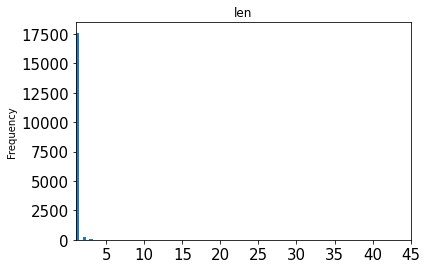

In [51]:
fastdup.create_components_gallery('out_peta', '.', get_label_func=get_label, num_images=5)


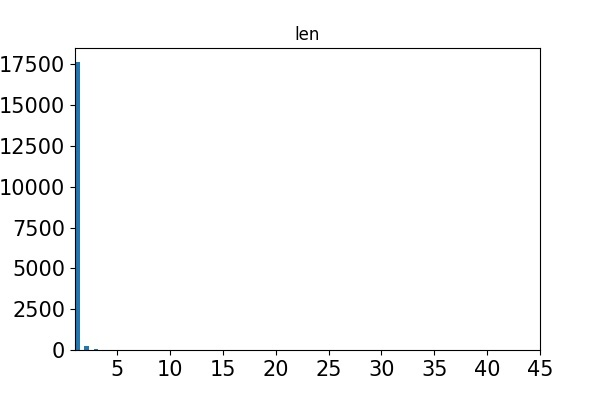
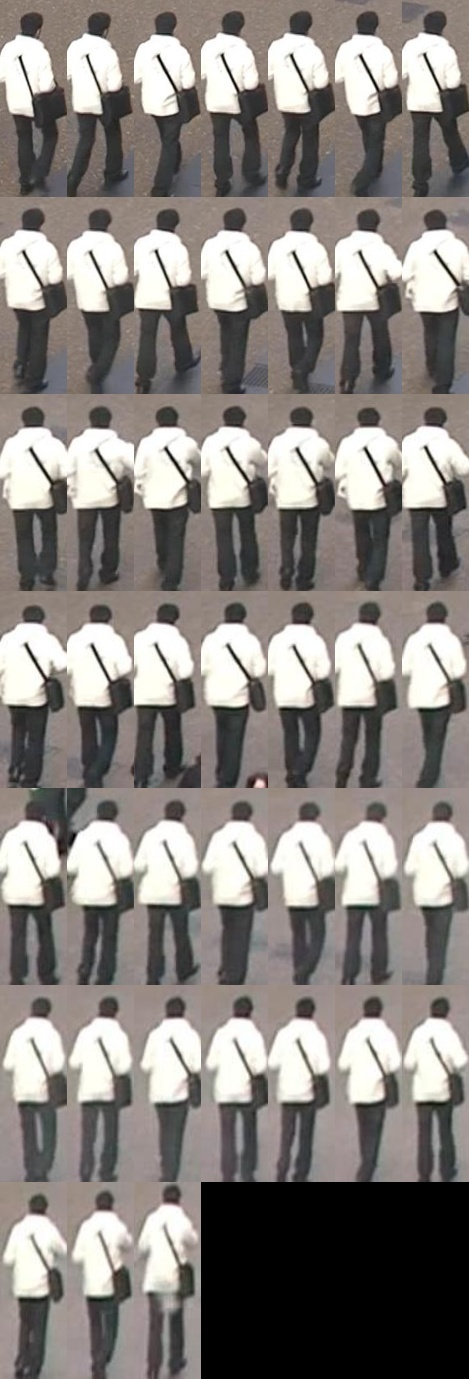
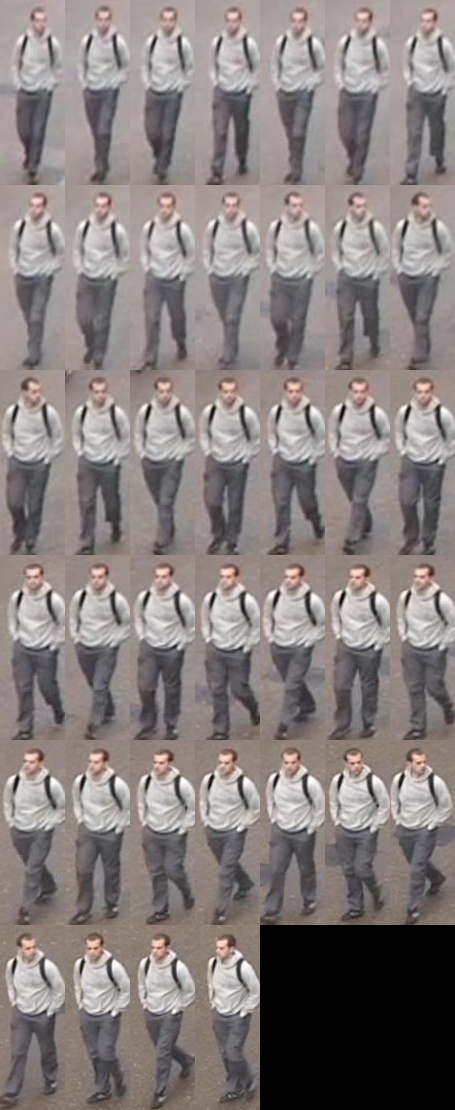
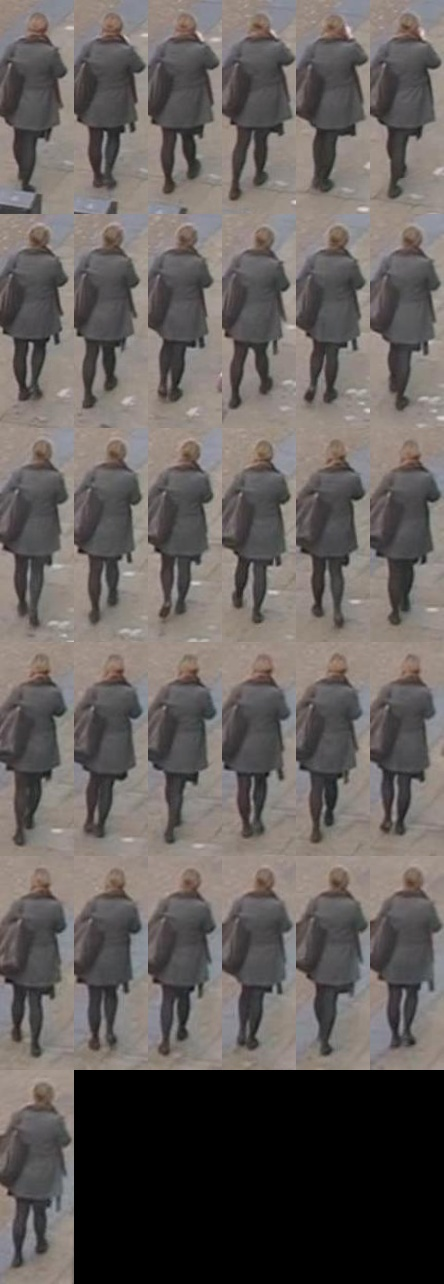
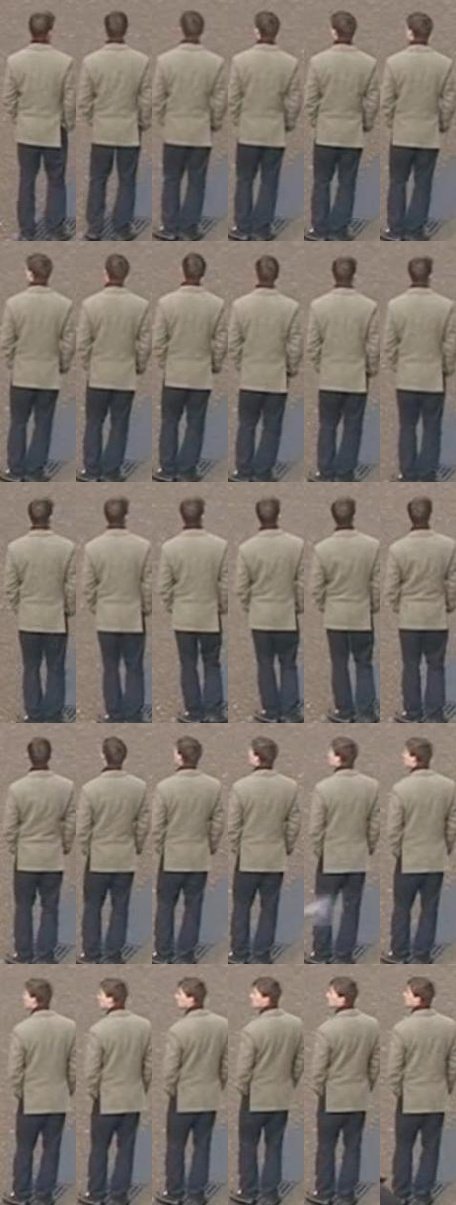
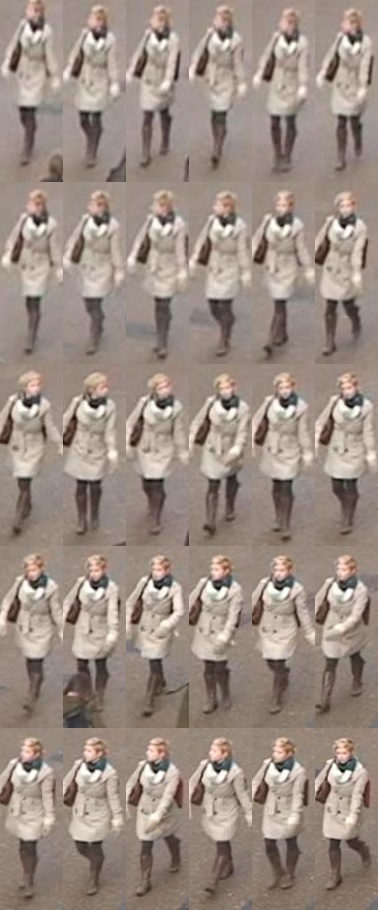

In [52]:
from IPython.display import HTML
HTML('./components.html')